<a href="https://colab.research.google.com/github/graviada/DataScienceProjects/blob/main/Huawei%20(2022)/Credit_German.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание**
### **Задача**:

macro_avg = 0.75 и выше

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')     # Стиль графиков, можно закомментировать
plt.rcParams['figure.figsize'] = (10, 7.5)              

from seaborn import heatmap

import sklearn
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, confusion_matrix

### **Изучение датасета**

In [ ]:
data_home = datasets.fetch_openml(name='credit-g')       # Загрузка датасета с OpenML

In [ ]:
Predictors_home = data_home.get('data')
Target_home = data_home.get('target')

**Описание атрибутов датасета**

        - checking_status         Состояние существующего расчетного счета в немецких марках
        - duration                Промежуток, на который брался счет в месяцах
        - credit_history          Кредитная история (взятые кредиты, своевременно погашенные, просрочки, критические счета)
        - purpose                 Цель кредита (автомобиль, телевизор, др.)
        - credit_amount           Сумма кредита
        - savings_status          Состояние сберегательного счета/облигаций в немецких марках
        - employment              Текущая занятость, количество лет в виде промежутка
        - installment_commitment  Ставка рассрочки в процентах от располагаемого дохода
        - personal_status         Личный статус (замужем, холост, др.) и пол
        - other_parties           Прочие должники/поручители
        - residence_since         Настоящее место жительства с X лет (в годах)
        - property_magnitude      Имущество (например, недвижимость)
        - age                     Возраст в годах
        - other_payment_plans     Другие виды рассрочки (банки, магазины)
        - housing                 Жилье (аренда, собственное, др.)
        - existing_credits        Количество существующих кредитов в этом банке
        - job                     Работа
        - num_dependents          Количество лиц, на которых возложена обязанность по содержанию
        - own_telephone           Телефон (да, нет)
        - foreign_worker          Иностранный работник (да, нет)

In [ ]:
Predictors_home.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [ ]:
Predictors_home.employment.cat.categories

Index(['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7'], dtype='object')

In [ ]:
Predictors_home.personal_status.cat.categories

Index(['male div/sep', 'female div/dep/mar', 'male single', 'male mar/wid',
       'female single'],
      dtype='object')

In [ ]:
Predictors_home.other_parties.cat.categories

Index(['none', 'co applicant', 'guarantor'], dtype='object')

In [ ]:
Predictors_home.residence_since.infer_objects

<bound method NDFrame.infer_objects of 0      4.0
1      2.0
2      3.0
3      4.0
4      4.0
      ... 
995    4.0
996    4.0
997    4.0
998    4.0
999    4.0
Name: residence_since, Length: 1000, dtype: float64>

С помощью функции info() посмотрим краткое описание данных. Нас будут интересовать размер датасета, тип данных, наличие нулевых (NaN) значений.

In [ ]:
Predictors_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [ ]:
Target_home.infer_objects

<bound method NDFrame.infer_objects of 0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: class, Length: 1000, dtype: category
Categories (2, object): ['good', 'bad']>

In [ ]:
sum(Target_home.isna())

0

In [ ]:
# Составим словарь, в котором ключами будут являться типы данных в датафрейме, а значениями - названия колонок
category_dict = Predictors_home.columns.groupby(Predictors_home.dtypes)
category_dict

{category: ['checking_status'], float64: ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents'], category: ['credit_history'], category: ['purpose'], category: ['savings_status'], category: ['employment'], category: ['personal_status'], category: ['other_parties'], category: ['property_magnitude'], category: ['other_payment_plans'], category: ['housing'], category: ['job'], category: ['own_telephone'], category: ['foreign_worker']}

**Итог:**

Размер набора примеров: 1000

Количество признаков: 21

Количество пропущенных значений: 0

Категориальных типов: 13

### **Подготовка данных**

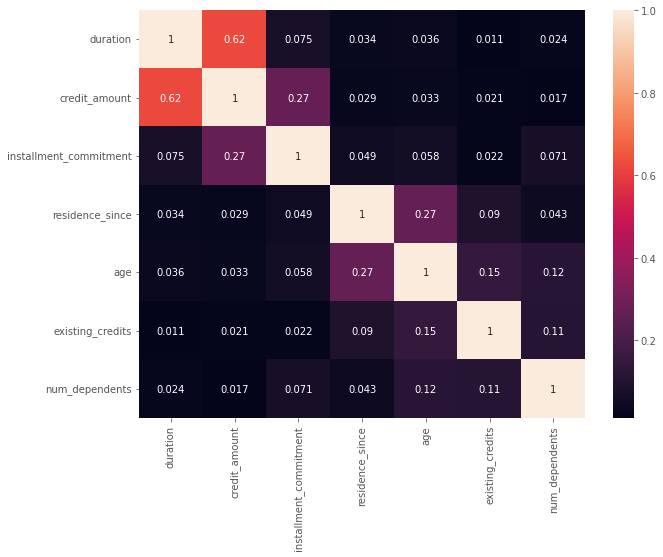

In [ ]:
# Корреляция всех представленных атрибутов друг с другом.
heatmap(abs(Predictors_home.corr()), annot=True)

Интерес представляет лишь взаимная корреляция duration и credit_amount (0.62). Очевидно, что большие суммы действительно будут превалировать в долгосрочных перспективах - это может быть ипотека, покупка автомобиля кредит - все то, на что у клиента нет возможности платить крупными суммами.

Теперь создадим дамми-переменные из категориальных типов.

In [ ]:
# Создание копии оригинального датафрейма
predictors_home = Predictors_home.copy()
  
predictors_home = pd.get_dummies(predictors_home,
                     columns = ['checking_status', 'credit_history', 'purpose',
                                'savings_status', 'employment', 'personal_status',
                                'other_parties', 'property_magnitude', 'other_payment_plans',
                                'housing', 'job', 'own_telephone', 'foreign_worker'])

predictors_home.head(5)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status_<0,checking_status_0<=X<200,checking_status_>=200,...,housing_own,housing_for free,job_unemp/unskilled non res,job_unskilled resident,job_skilled,job_high qualif/self emp/mgmt,own_telephone_none,own_telephone_yes,foreign_worker_yes,foreign_worker_no
0,6.0,1169.0,4.0,4.0,67.0,2.0,1.0,1,0,0,...,1,0,0,0,1,0,0,1,1,0
1,48.0,5951.0,2.0,2.0,22.0,1.0,1.0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,12.0,2096.0,2.0,3.0,49.0,1.0,2.0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
3,42.0,7882.0,2.0,4.0,45.0,1.0,2.0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
4,24.0,4870.0,3.0,4.0,53.0,2.0,2.0,1,0,0,...,0,1,0,0,1,0,1,0,1,0


In [ ]:
# Посмотрим, как преобразились наши данные
predictors_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 63 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   duration                                       1000 non-null   float64
 1   credit_amount                                  1000 non-null   float64
 2   installment_commitment                         1000 non-null   float64
 3   residence_since                                1000 non-null   float64
 4   age                                            1000 non-null   float64
 5   existing_credits                               1000 non-null   float64
 6   num_dependents                                 1000 non-null   float64
 7   checking_status_<0                             1000 non-null   uint8  
 8   checking_status_0<=X<200                       1000 non-null   uint8  
 9   checking_status_>=200                          1000 n

In [ ]:
# Смотрим наличие корреляции в атрибутах с целевым столбцом. Нас интересует модуль корреляции.
# Но при этом линейно-зависимые признаки нам не сильно мешают в регрессии (мешают в классификации)
corr_pr_home = abs(predictors_home.corr().iloc[0, 1:])